# **Pima Indians Diabetes Database**

"This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage."

https://www.kaggle.com/uciml/pima-indians-diabetes-database


Importando conjunto de treino:

In [29]:
import pandas as pd
import numpy as np


#importing dataframe 
df = pd.read_csv('/content/Pima-Diabetes.csv',delimiter=",", names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'], encoding = 'unicode_escape')

#dataframe shape
print(df.shape)
print(list(df))
df

(758, 9)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1
755,1,128,88,39,110,36.5,1.057,37,1
756,7,137,90,41,0,32.0,0.391,39,0


# **Visualizando Dados**


Contando células vazias:

In [78]:
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Contando numero de dados nulos por "*feature*":




In [77]:
for i in list(df.drop(df['Outcome'])):
  
  print(f"{i}: {(df[i] == 0).sum()}")

Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 223
Insulin: 367
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 493


Visualizando distribuição dos dados:

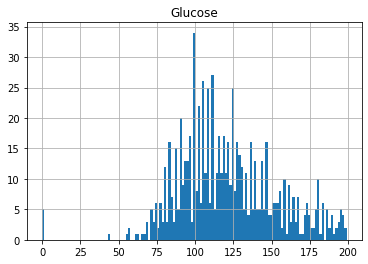

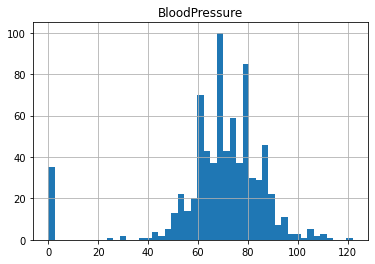

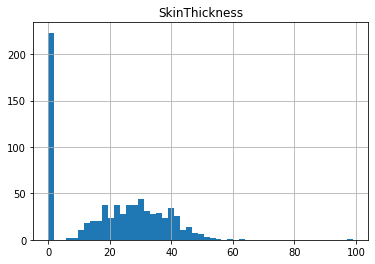

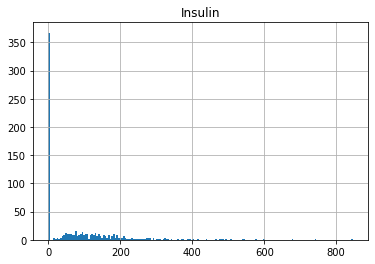

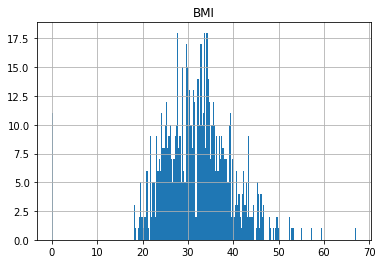

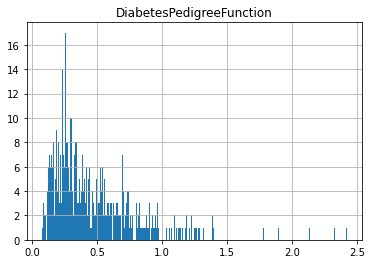

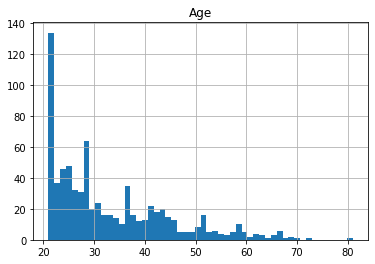

In [28]:
import matplotlib.pyplot as plt

for i in list(df.drop(df['Outcome'])):
  
  df[i].hist(bins=len(df[i].value_counts()),label=str)
  plt.title(i)
  plt.show()
  

# **Treino**

Separando em conjunto de treino e validação:

In [61]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Outcome'])
y = df['Outcome']          

X_train, X_val, y_train, y_val = train_test_split(
     X,
     y,
     test_size=0.3, 
     random_state=42)

print(X_train.shape)

(530, 8)


Nessa tarefa, o modelo usado será uma rede neural sequencial com camadas densas:

In [55]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
  Dense(16, activation='relu',input_shape=X_train.shape),
  Dense(8, activation='relu'),
  Dense(2, activation='softmax'),
  ])



Compilando modelo:

In [56]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )

Treinando modelo:

In [68]:
from tensorflow.keras.utils import to_categorical


model.fit(
  X_train,
  to_categorical(y_train),
  epochs=20,
  batch_size=32,
  verbose=0
  )

Avaliando performance:

In [69]:
model.evaluate(
  X_val,
  to_categorical(y_val)
  )

8/8 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.6535


[0.631813108921051, 0.6535087823867798]

# **Predição**

Importando conjunto de teste:

In [64]:

#importing test dataframe 
df_pred = pd.read_csv('/content/Test-Group-2.csv',delimiter=",", names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'], encoding = 'unicode_escape')

Contando células vazias:

In [79]:
print(df_pred.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


Contando número de dados nulos por "*feature*":


In [81]:
for i in list(df_pred):
  
  print(f"{i}: {(df_pred[i] == 0).sum()}")

Pregnancies: 0
Glucose: 0
BloodPressure: 0
SkinThickness: 4
Insulin: 7
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0


Fazendo predições a partir dos dados do conjunto de teste:

In [76]:
predictions = model.predict(df_pred)

#printing predicted values from test dataframe
print(f"\n__________________\n\nValores Previstos:\n__________________\n\n{np.argmax(predictions, axis=1)}")




__________________

Valores Previstos:
__________________

[0 1 0 1 0 0 1 0 1 0]
